The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

#### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

In [169]:
import pandas as pd
train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

### Data description:

#### Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
#### Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#### Name - Name
#### Age - Age
#### Sibsp - Number of Siblings/Spouses Aboard
#### Parch - Number of Parents/Children Aboard
#### Ticket - Ticket Number
#### Fare - Passenger Fare
#### Cabin - Cabin
#### Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [170]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [171]:
train_data.isnull().values.any()

True

In [172]:
train_data.isnull().sum().sum()

866

In [173]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [176]:
# There are so many missing values in three different featurs
# The ML model works better when missing rows are deleted so data observations are less
# There are catogerical fetures which we need to convert into numric value

In [177]:
# delete missing values from train data

train_data.dropna(how='any', inplace = True)


In [178]:
test_data.dropna(how='any',inplace = True)

In [179]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [180]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data = [train_data, test_data]

for item in data:
    item['Deck'] = item['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    item['Deck'] = item['Deck'].map(deck)

train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [181]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,5.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,7.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,4.0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,2.0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2.0


In [182]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for item in data:
    
    item['P_Title'] = item.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    item['P_Title'] = item['P_Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    item['P_Title'] = item['P_Title'].replace('Mlle', 'Miss')
    item['P_Title'] = item['P_Title'].replace('Ms', 'Miss')
    item['P_Title'] = item['P_Title'].replace('Mme', 'Mrs')
    
    item['P_Title'] = item['P_Title'].map(titles)
    

train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [183]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,P_Title
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,3.0,3
3,4,1,1,female,35.0,1,0,113803,53.1000,S,3.0,3
6,7,0,1,male,54.0,0,0,17463,51.8625,S,5.0,1
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,S,7.0,2
11,12,1,1,female,58.0,0,0,113783,26.5500,S,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,S,4.0,3
872,873,0,1,male,33.0,0,0,695,5.0000,S,2.0,1
879,880,1,1,female,56.0,0,1,11767,83.1583,C,3.0,3
887,888,1,1,female,19.0,0,0,112053,30.0000,S,2.0,2


In [184]:

p_embarked = pd.get_dummies(train_data.Embarked)
train_data = pd.concat([train_data, p_embarked], axis=1)

In [185]:
p_sex = pd.get_dummies(train_data.Sex)
train_data = pd.concat([train_data, p_sex], axis=1)



In [186]:
p_class_cat = pd.get_dummies(train_data.Pclass)
train_data=pd.concat([train_data, p_class_cat], axis=1)
train_data.rename(columns={1:'Frist_Class',2:'Second_Class2',3:'Second_Class3'}, inplace=True)



In [187]:
p_embarked = pd.get_dummies(test_data.Embarked)
test_data = pd.concat([test_data, p_embarked], axis=1)
p_sex = pd.get_dummies(test_data.Sex)
test_data = pd.concat([test_data, p_sex], axis=1)
p_class_cat = pd.get_dummies(test_data.Pclass)
test_data=pd.concat([test_data, p_class_cat], axis=1)
test_data.rename(columns={1:'Frist_Class',2:'Second_Class2',3:'Second_Class3'}, inplace=True)

In [188]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,3.0,3,1,0,0,1,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,3.0,3,0,0,1,1,0,1,0,0
6,7,0,1,male,54.0,0,0,17463,51.8625,S,5.0,1,0,0,1,0,1,1,0,0
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,S,7.0,2,0,0,1,1,0,0,0,1
11,12,1,1,female,58.0,0,0,113783,26.5500,S,3.0,2,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,11751,52.5542,S,4.0,3,0,0,1,1,0,1,0,0
872,873,0,1,male,33.0,0,0,695,5.0000,S,2.0,1,0,0,1,0,1,1,0,0
879,880,1,1,female,56.0,0,1,11767,83.1583,C,3.0,3,1,0,0,1,0,1,0,0
887,888,1,1,female,19.0,0,0,112053,30.0000,S,2.0,2,0,0,1,1,0,1,0,0


In [189]:
train_data = train_data.drop(['Sex'], axis=1)
test_data = test_data.drop(['Sex'], axis=1)
train_data = train_data.drop(['Pclass'], axis=1)
test_data = test_data.drop(['Pclass'], axis=1)
train_data = train_data.drop(['Embarked'], axis=1)
test_data = test_data.drop(['Embarked'], axis=1)

In [190]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3
1,2,1,38.0,1,0,PC 17599,71.2833,3.0,3,1,0,0,1,0,1,0,0
3,4,1,35.0,1,0,113803,53.1000,3.0,3,0,0,1,1,0,1,0,0
6,7,0,54.0,0,0,17463,51.8625,5.0,1,0,0,1,0,1,1,0,0
10,11,1,4.0,1,1,PP 9549,16.7000,7.0,2,0,0,1,1,0,0,0,1
11,12,1,58.0,0,0,113783,26.5500,3.0,2,0,0,1,1,0,1,0,0


In [191]:
data = [train_data, test_data]
for item in data:
    item['Family_Member'] = item['SibSp'] + item['Parch']
    item.loc[item['Family_Member'] > 0, 'With_family'] = 0
    item.loc[item['Family_Member'] == 0, 'With_family'] = 1
    item['With_family'] = item['With_family'].astype(int)
    
    
train_data

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3,Family_Member,With_family
1,2,1,38.0,1,0,PC 17599,71.2833,3.0,3,1,0,0,1,0,1,0,0,1,0
3,4,1,35.0,1,0,113803,53.1000,3.0,3,0,0,1,1,0,1,0,0,1,0
6,7,0,54.0,0,0,17463,51.8625,5.0,1,0,0,1,0,1,1,0,0,0,1
10,11,1,4.0,1,1,PP 9549,16.7000,7.0,2,0,0,1,1,0,0,0,1,2,0
11,12,1,58.0,0,0,113783,26.5500,3.0,2,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,47.0,1,1,11751,52.5542,4.0,3,0,0,1,1,0,1,0,0,2,0
872,873,0,33.0,0,0,695,5.0000,2.0,1,0,0,1,0,1,1,0,0,0,1
879,880,1,56.0,0,1,11767,83.1583,3.0,3,1,0,0,1,0,1,0,0,1,0
887,888,1,19.0,0,0,112053,30.0000,2.0,2,0,0,1,1,0,1,0,0,0,1


In [192]:
train_data = train_data.drop(['SibSp'], axis=1)
test_data = test_data.drop(['SibSp'], axis=1)
train_data = train_data.drop(['Parch'], axis=1)
test_data = test_data.drop(['Parch'], axis=1)

In [193]:
train_data 

,PassengerId,Survived,Age,Ticket,Fare,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3,Family_Member,With_family
1,2,1,38.0,PC 17599,71.2833,3.0,3,1,0,0,1,0,1,0,0,1,0
3,4,1,35.0,113803,53.1000,3.0,3,0,0,1,1,0,1,0,0,1,0
6,7,0,54.0,17463,51.8625,5.0,1,0,0,1,0,1,1,0,0,0,1
10,11,1,4.0,PP 9549,16.7000,7.0,2,0,0,1,1,0,0,0,1,2,0
11,12,1,58.0,113783,26.5500,3.0,2,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,47.0,11751,52.5542,4.0,3,0,0,1,1,0,1,0,0,2,0
872,873,0,33.0,695,5.0000,2.0,1,0,0,1,0,1,1,0,0,0,1
879,880,1,56.0,11767,83.1583,3.0,3,1,0,0,1,0,1,0,0,1,0
887,888,1,19.0,112053,30.0000,2.0,2,0,0,1,1,0,1,0,0,0,1


In [194]:
data = [train_data, test_data]

for item in data:
    item['Age'] = item['Age'].astype(int)
    item.loc[item['Age'] <= 11, 'Age'] = 0
    item.loc[(item['Age'] > 11) & (item['Age']<=18)]= 1
    item.loc[(item['Age']>18) & (item['Age']<=22)]= 2
    item.loc[(item['Age']>22) & (item['Age']<=27)]= 3
    item.loc[(item['Age']>27) & (item['Age']<=33)]= 4
    item.loc[(item['Age']>33) & (item['Age']<=40)]= 5
    item.loc[(item['Age']>40) & (item['Age']<=66)]= 6
    item.loc[item['Age'] > 66, 'Age'] = 6


In [195]:
train_data

,PassengerId,Survived,Age,Ticket,Fare,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3,Family_Member,With_family
1,5,5,5,5,5.0,5.0,5,5,5,5,5,5,5,5,5,5,5
3,5,5,5,5,5.0,5.0,5,5,5,5,5,5,5,5,5,5,5
6,6,6,6,6,6.0,6.0,6,6,6,6,6,6,6,6,6,6,6
10,11,1,0,PP 9549,16.7,7.0,2,0,0,1,1,0,0,0,1,2,0
11,6,6,6,6,6.0,6.0,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,6,6,6,6,6.0,6.0,6,6,6,6,6,6,6,6,6,6,6
872,4,4,4,4,4.0,4.0,4,4,4,4,4,4,4,4,4,4,4
879,6,6,6,6,6.0,6.0,6,6,6,6,6,6,6,6,6,6,6
887,2,2,2,2,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2


In [196]:
train_data['Fare'].describe()

count    183.000000
mean       8.542350
std       19.547723
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max      151.550000
Name: Fare, dtype: float64

In [197]:
pd.qcut(train_data.Fare, q=4) 

1         (3.0, 5.0]
3         (3.0, 5.0]
6         (5.0, 6.0]
10     (6.0, 151.55]
11        (5.0, 6.0]
           ...      
871       (5.0, 6.0]
872       (3.0, 5.0]
879       (5.0, 6.0]
887     (0.999, 3.0]
889     (0.999, 3.0]
Name: Fare, Length: 183, dtype: category
Categories (4, interval[float64]): [(0.999, 3.0] < (3.0, 5.0] < (5.0, 6.0] < (6.0, 151.55]]

In [198]:
data = [train_data, test_data]



for item in data:
    item.loc[item['Fare'] <= 3.0, 'Fare'] = 0
    item.loc[(item['Fare'] > 3.0) & (item['Fare'] <= 5.0), 'Fare'] = 1
    item.loc[(item['Fare'] > 5.0) & (item['Fare'] <= 6.0), 'Fare']   = 2
    item.loc[(item['Fare'] > 6.0) & (item['Fare'] <= 151.55), 'Fare']   = 3
    item.loc[item['Fare'] > 151.55, 'Fare'] = 4
    item['Fare'] = item['Fare'].astype(int)

In [199]:
test_data
    


,PassengerId,Age,Ticket,Fare,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3,Family_Member,With_family
12,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3
14,6,6,6,2,6,6,6,6,6,6,6,6,6,6,6,6
24,6,6,6,2,6,6,6,6,6,6,6,6,6,6,6,6
26,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
28,6,6,6,2,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,6,6,6,2,6,6,6,6,6,6,6,6,6,6,6,6
405,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
407,6,6,6,2,6,6,6,6,6,6,6,6,6,6,6,6
411,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5


In [200]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

train_data = train_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['PassengerId'], axis=1)

In [201]:
train_data.dtypes

Survived           int64
Age                int64
Fare               int64
Deck             float64
P_Title            int64
C                  uint8
Q                  uint8
S                  uint8
female             uint8
male               uint8
Frist_Class        uint8
Second_Class2      uint8
Second_Class3      uint8
Family_Member      int64
With_family        int64
dtype: object

In [202]:
train_data['Deck'] = train_data['Deck'].astype(int)


In [203]:
test_data.dtypes

Age              int64
Fare             int64
Deck             int64
P_Title          int64
C                uint8
Q                uint8
S                uint8
female           uint8
male             uint8
Frist_Class      uint8
Second_Class2    uint8
Second_Class3    uint8
Family_Member    int64
With_family      int64
dtype: object

In [204]:
test_data

,Age,Fare,Deck,P_Title,C,Q,S,female,male,Frist_Class,Second_Class2,Second_Class3,Family_Member,With_family
12,3,0,3,3,3,3,3,3,3,3,3,3,3,3
14,6,2,6,6,6,6,6,6,6,6,6,6,6,6
24,6,2,6,6,6,6,6,6,6,6,6,6,6,6
26,2,0,2,2,2,2,2,2,2,2,2,2,2,2
28,6,2,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,6,2,6,6,6,6,6,6,6,6,6,6,6,6
405,2,0,2,2,2,2,2,2,2,2,2,2,2,2
407,6,2,6,6,6,6,6,6,6,6,6,6,6,6
411,5,1,5,5,5,5,5,5,5,5,5,5,5,5


In [516]:
train.values

array([[  1,   3,   1],
       [  2,   1,   1],
       [  3,   3,   0],
       ...,
       [889,   3,   1],
       [890,   1,   0],
       [891,   3,   0]])

In [392]:
X = train.values[:,[0,2]]
y = train.values[:,1]


In [393]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [394]:
print(X.shape)
print(y.shape)

(891, 2)
(891,)


## K-nearest neighbors(KNN) Classification
### scikit-learn 4-step modeling pattern

In [395]:
# step1: Import the class 

from sklearn.neighbors import KNeighborsClassifier

In [396]:
# step 2: Instantiate the estimator
# Estimator is scikit-learn term for model
# Instanitiate means make an instance of

clf = KNeighborsClassifier(n_neighbors=5)

In [397]:
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [398]:
# step 3: fit the model with data
# model is learning the relatinship between X and y
# occurs in-place

clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [399]:
clf.predict(X)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 1, 1, 2, 2, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3,

## Logistic regression

In [400]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model(useing default parameters)

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,y)

# predict the response value for the observation in x
logreg.predict(X)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [401]:
# store the predicted response values

y_pred = logreg.predict(X)

# check how many predictions were granted
len(y_pred)

891

In [402]:
# compute clasification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.5510662177328844


# KNN(K=5)

In [403]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X,y)

y_pred = clf.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.5993265993265994


# KNN(K=1)

In [404]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

y_pred = clf.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


## Evaluation procedure 2: Train/Test split

In [405]:
print(X.shape)
print(y.shape)

(891, 2)
(891,)


In [419]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state=4)

In [420]:
print(X_train.shape)
print(y_train.shape)

(534, 2)
(534,)


In [421]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [422]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5630252100840336


In [423]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.37815126050420167


In [529]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.38375350140056025


In [522]:
train.shape[1]

3

Data description:

#Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
#Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#Name - Name
#Age - Age
#Sibsp - Number of Siblings/Spouses Aboard
#Parch - Number of Parents/Children Aboard
#Ticket - Ticket Number
#Fare - Passenger Fare
#Cabin - Cabin
#Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [469]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [525]:

test.shape

(418, 11)

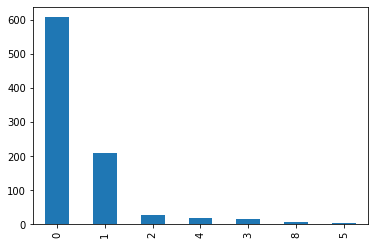

In [472]:
pd.value_counts(train['SibSp']).plot.bar()

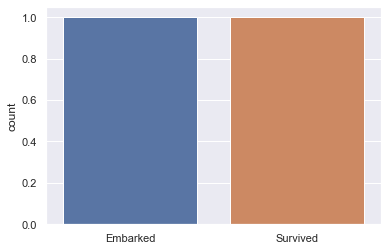

In [501]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=['Embarked','Survived'], data=train)

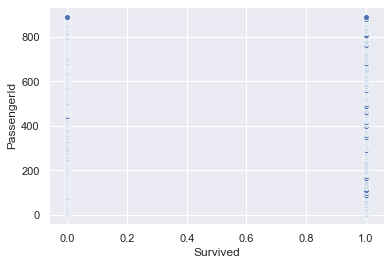

In [550]:
sns.scatterplot(data=train_data, x="Survived", y="PassengerId")